# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: <br>
City perspective:<br> 
- Usage: Average bike downtime;
- Usage: Trips Taken per month per bike (or per Subscriber);
- Usage: Average Distance, Average Trip Duration;
- Revenue stream: Number of subscribers;
- Performance: Popular Routes and Nodes;
- Performance: as above taken to each day hour;
- Performance: busiest time of a day;

Similarities of bike usage for each city:
- Marketing: Subscribers to Customers ratio;
- Marketing: Weekdays vs. Weekend vs. Holidays number of rides;
- Usage: Number of subscribers per station;
- Usage: Trip durations (or distance) per subscriber or per customer;
- Usage: Average Speed (Distance/Duration)

From user perspective:
- Availability and reliability of service, ie availablity of bike at each station.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

In [19]:
## import all necessary packages and functions.
import csv # read and write csv files
import calendar # to recieve day name for the date
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [21]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        #Use the csv library to set up a DictReader object
        trip_reader = csv.DictReader(f_in)
        
        # Use a function on the DictReader object to read the first trip from the data file and store it in a variable.
        first_trip = next(trip_reader)
        
        # Use the pprint library to print the first trip.
        pprint (first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [22]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    """
    if city == 'NYC':
        duration=int(datum['tripduration'])/60
        
    elif city == 'Chicago':
            duration=int(datum['tripduration'])/60
        
    elif city == 'Washington':
            duration=int(datum['Duration (ms)'])/60000
            
    else: 
        print('Code does not recognise the input: CITY ERROR')
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [23]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    'starttime', '1/1/2016 00:09:55'
    'starttime', '3/31/2016 23:30'
    'Start date', '3/31/2016 22:57'
    Remember: 
    - NYC includes seconds, while Washington and Chicago do not.
    - NOT IMPLEMENTED: different time zones - UTC
    """
    
    if city == 'NYC':
        time_stamp = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M:%S")
        
        
    elif city == 'Chicago':
        time_stamp = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M")
        
        
    elif city == 'Washington':
        time_stamp = datetime.strptime(datum['Start date'], "%m/%d/%Y %H:%M")
            
    else: 
        print('Code does not recognise the input: CITY ERROR')
    
    day_of_week = time_stamp.strftime('%A')
    month = time_stamp.month
    hour = time_stamp.hour
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [25]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago and NYC. 
    NYC-'usertype', 'Customer', 'Subscriber'
    Chicago-'usertype', 'Subscriber', 'Customer',
    Wash-'Member Type', 'Registered', 'Casual'
    """
    
    if city == 'NYC' or city == 'Chicago':
        user_type = datum['usertype']      
        
    elif city == 'Washington':
    #If block unifies usetype across the code
        if datum['Member Type']=="Registered":
            user_type = 'Subscriber'
        elif datum['Member Type']=="Casual":
            user_type = 'Customer'
        else:
            print ('Usertype Error')
    else: 
        print('Code does not recognise the input: CITY ERROR')
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [26]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## Set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row        
        for row in trip_reader:
            # Setting up a dictionary to hold the values for the cleaned and trimmed data point
            new_point = {}
            # Using the helper functions to get the cleaned data from the original data dictionaries
            new_point[out_colnames[0]]= duration_in_mins(row, city)
            new_point[out_colnames[1]], new_point[out_colnames[2]], new_point[out_colnames[3]]=time_of_trip(row, city)
            new_point[out_colnames[4]]=type_of_user(row, city)
            # Writing processed information to the output file.
            trip_writer.writerow(new_point)
            

In [27]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
New York has higher number of trips (267k), than Washington (66k) and Chicago (72k) combined. New York also has higher proportion of trips made by subscribers (89%). Chicago has higher percentage of trips made by short-term customers (24%).

Note: The data analysed for this answer constitutes different time periods: NYC operations has longer history than Washington and Chicago branches.

In [29]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # total trip by subscribers and customers
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        # IMPORTANT: The data has to be gathered from 1/4/2016 since NYC has longer history!
        n_total = n_subscribers + n_customers 
    
        # return tallies as a tuple
        return(n_total, round(n_subscribers/n_total*100,2), round(n_customers/n_total*100,2))

In [30]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = ['./examples/BayArea-Y3-Summary.csv','./data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv','./data/Washington-2016-Summary.csv']

print('''NYC: 
Total rides {0[0]:,}.
Trips made by subscribers {0[1]}%.
Trips made by customers {0[2]}%.
'''.format(number_of_trips(data_file[1])))
print('''Chicago: 
Total rides {0[0]:,}. 
Trips made by subscribers {0[1]}%. 
trips made by customers {0[2]}%.
'''.format(number_of_trips(data_file[2])))
print('''Washington: 
Total rides {0[0]:,}.
Trips made by subscribers {0[1]}%. 
Trips made by customers {0[2]}%.
'''.format(number_of_trips(data_file[3])))

NYC: 
Total rides 276,798.
Trips made by subscribers 88.84%.
Trips made by customers 11.16%.

Chicago: 
Total rides 72,131. 
Trips made by subscribers 76.23%. 
trips made by customers 23.77%.

Washington: 
Total rides 66,326.
Trips made by subscribers 78.03%. 
Trips made by customers 21.97%.



**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: New York average trip duration is ≈16 minutes, and long trips constitute 7.3% of all trips.
Chicago average trip is a minute longer (≈17min), and proportion of long trips longer than 30 minutes is greater (8.33%). Trips in Washington are on average ≈19min long, which may result in higher portion of trips over 30min (10.84%). 

We can hypothesize that higher percentage of rides above the 30min threshold is caused by city planning and longer distances to be travelled. Exploring the data further may expose other particularities and streghten or overturn the hypothesis.

In [31]:
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def duration_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips below and above 30min threshold.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        total_duration = 0
        n_short_trips = 0
        n_long_trips = 0
        
        # total trip by subscribers and customers
        for row in reader:
            total_duration+=float(row['duration'])        
            
            if float(row['duration']) > 30:
                n_long_trips += 1
            else:
                n_short_trips += 1
        
        # compute total number of rides
        n_trips = n_short_trips + n_long_trips 
        average_duration = total_duration/n_trips
        
        # return tallies as a tuple
        return(round(average_duration,2), round(n_short_trips/n_trips*100,2), round(n_long_trips/n_trips*100,2))

data_file = ['./examples/BayArea-Y3-Summary.csv','./data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv','./data/Washington-2016-Summary.csv']

print('''NYC:
Average trip duration {0[0]:,} min.
Long trips constitute {0[2]}% of all trips.
'''.format(duration_of_trips(data_file[1])))
print('''Chicago:
Average trip duration {0[0]:,} min.
Long trips {0[2]}%.
'''.format(duration_of_trips(data_file[2])))
print('''Washington:
Average trip duration {0[0]:,} min.
Long trips {0[2]}%.
'''.format(duration_of_trips(data_file[3])))


NYC:
Average trip duration 15.81 min.
Long trips constitute 7.3% of all trips.

Chicago:
Average trip duration 16.56 min.
Long trips 8.33%.

Washington:
Average trip duration 18.93 min.
Long trips 10.84%.



**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: One of the possible corrective actions for 4b would be allowing longer non-penalised trips. Thus, I have chosen to explore Washigton data further. The average trip for Washington scheme subscriber is ≈12.5min, which is 3.2 times shorter than that of the unregistered user (≈42min). Therefore, the original hypothesis was incorrect, since the average trip duration is being affected of higher percentage of unregistered customers making significnatly longer trips.

In [32]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def duration_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips below and above 30min threshold.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        subscribers_duration = 0
        customer_duration = 0
        n_subscriber_trips = 0
        n_customer_trips = 0
        
        # total trip by subscribers and customers
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subscribers_duration += float(row['duration'])
                n_subscriber_trips += 1
            else:
                customer_duration += float(row['duration'])
                n_customer_trips += 1
        
        # return tallies as a tuple
        return(round(subscribers_duration/n_subscriber_trips,2), round(customer_duration/n_customer_trips,2))

data_file = ['./examples/BayArea-Y3-Summary.csv','./data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv','./data/Washington-2016-Summary.csv']

print('''Washington:
Subscribers average trip duration {0[0]:,}min.
Customers average trip duration {0[1]}min.
'''.format(duration_of_trips(data_file[3])))


Washington:
Subscribers average trip duration 12.53min.
Customers average trip duration 41.68min.



<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

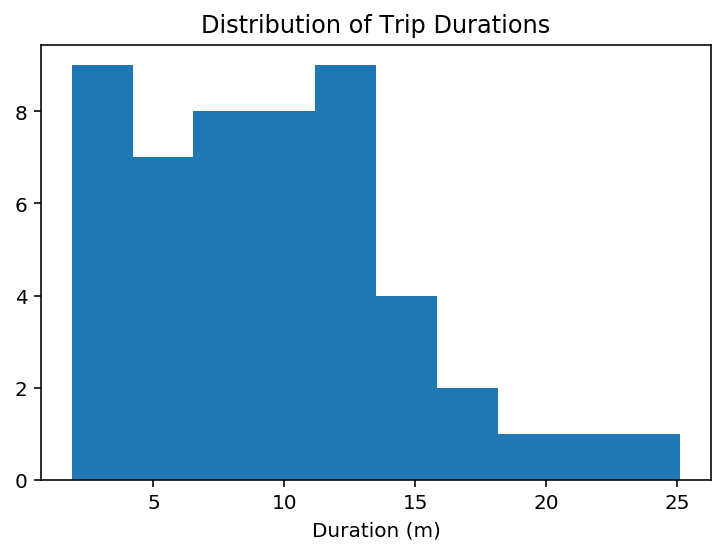

In [1]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

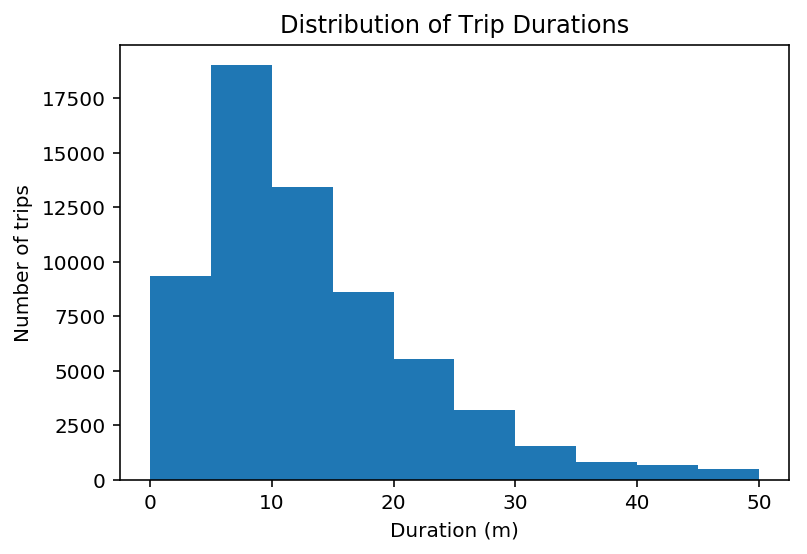

In [34]:
# Collecting all of the trip times as a list
data=[]
with open('./data/Washington-2016-Summary.csv', 'r') as f_in:
        reader = csv.DictReader(f_in)
        data=[]
        
        for row in reader:
            data.append(round(float(row['duration']),2))

# Generate a histogram of trip times with pyplot                      
%matplotlib inline 
plt.hist(data,range=(0,50))

plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.ylabel('Number of trips')
plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Both trip times distributions are visually bell shaped, uni-modal and positively skewed. <br>
The subscribers distribution is strongly leptokurtic around its 6min mode. 
Customers trip times distribution has less visually obvious mode at around 16min. The distribution statistics comes with several modes at 11 and 19minutes, and 50% percentile of 24min. These statistics and distribution visualisation indicates heavy (fat) tails: indeed, ≈30% of trips are above 40min.

50% percentile of Customer trips is located at 24min, with trips above 40min is 29.0%


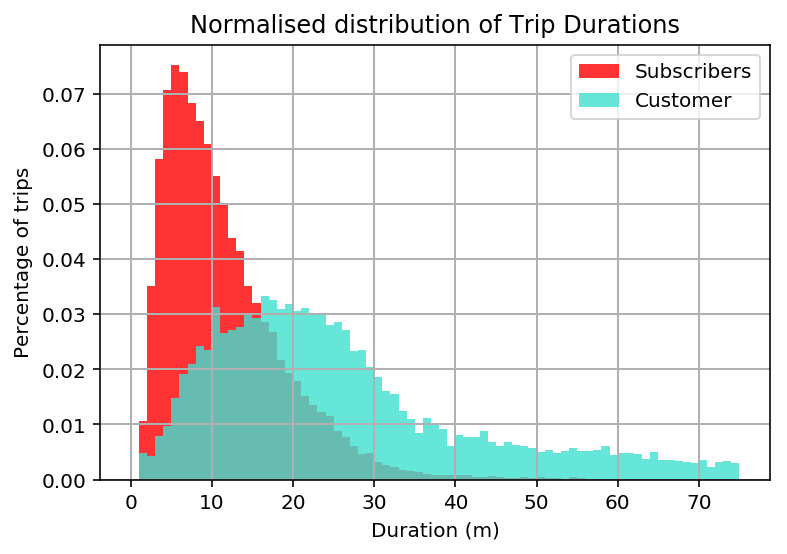

In [35]:
# Generate a histogram of trip times distribution for different types of users  with pyplot                      
import statistics

with open('./data/Washington-2016-Summary.csv', 'r') as f_in:
        reader = csv.DictReader(f_in)
        data_subscriber, data_customer=[],[]
        
        #Creating data sets for each user type
        
        for row in reader:
            if row['user_type']=='Subscriber':
                data_subscriber.append(round(float(row['duration']),2))
            else:
                data_customer.append(round(float(row['duration']),2))


sum_trips=0
long_trips=0


for index,value in enumerate(data_customer):
    sum_trips+=1
    if data_customer[index]>40:
        long_trips+=1

print('''50% percentile of Customer trips is located at {}min, with trips above 40min is {}%'''
      .format(int(statistics.median_grouped(data_customer)), round(long_trips/sum_trips*100,0)))
        
# Visualisation with matplotlib. Use single graph for both data sets

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Change bins to 15 to answer the question no.5

plt.hist(data_subscriber,bins=75,range=(0,75),density=True,alpha=0.8,color='red',label='Subscribers',stacked=True)
plt.hist(data_customer,bins=75,range=(0,75),density=True,alpha=0.8,color='turquoise',label='Customer',stacked=True)
plt.title('Normalised distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.ylabel('Percentage of trips')
plt.legend(loc='upper right')
plt.grid(True, markevery=1,linewidth=1)
plt.show()


 <a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

**Answer**: Washington average trip duration 18.93min, which is consistent with previously calcualted 18.93 min.
Workdays trip times are more pronounced (leuptokurtic) than those on weekends. Workday average trip is ≈17min long, which is somewhat shorter than weekend's average trip ≈24min.
The subscribers times are similar across the workday and weekends with average trip of ≈12min on workday and ≈13min on weekend. On opposite, customers usualy make shorter trips on workday (≈40min) than on weekend (44min). 
The alike distributions are commonly analysed with second (standard deviation), third and fourth moments (skewness and kurtosis), which are out the scope in this project.
Further investigation shows that Saturday has on average 40% more trips than other weekdays, which are made by significantly increased number of Customers. Further data drill down is necessary to route the cause of such abnormality. 


Washington average trip duration 18.93min, which is consistent with previously calcualted 18.93 min.
Workday average trip is 17.0min long, which is somewhat shorter than weekend's average trip 24.4min.
The subscribers pattern is similar across the workday and weekends 
with average trip on workday 12.4min and weekend 13.0min.
On opposite, customers usualy make shorter trips on workday 39.9min than on weekend 44.0min.



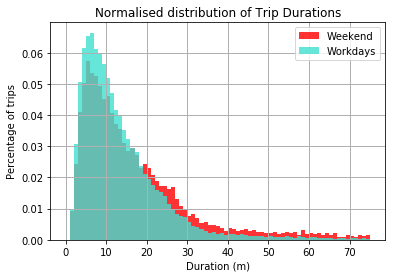

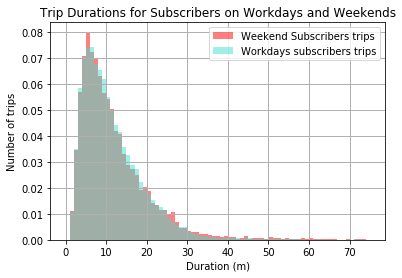

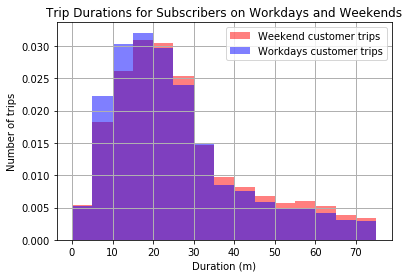

In [22]:
# Exploring only Washington data set
# Exploring pattern of ridership on the weekends versus weekdays, for Subscribers, Customers and all users.
# The average duration of rides depending on the day of the week.

import statistics

with open('./data/Washington-2016-Summary.csv', 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #Creating six data sets: for workdays and weekend and for all users together and individually
        
        t,t_work, t_we, t_subscriber_we, t_customer_we, t_subscriber_work, t_customer_work = [],[],[],[],[],[],[]

        for row in reader:
            t.append(round(float(row['duration']),2))
            if row['day_of_week']=='Saturday' or row['day_of_week']=='Sunday':
                t_we.append(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    t_subscriber_we.append(round(float(row['duration']),2))
                else:
                    t_customer_we.append(round(float(row['duration']),2))
            else:
                t_work.append(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    t_subscriber_work.append(round(float(row['duration']),2))
                else:
                    t_customer_work.append(round(float(row['duration']),2))

print ('''
Washington average trip duration {}min, which is consistent with previously calcualted 18.93 min.
Workday average trip is {}min long, which is somewhat shorter than weekend's average trip {}min.
The subscribers pattern is similar across the workday and weekends 
with average trip on workday {}min and weekend {}min.
On opposite, customers usualy make shorter trips on workday {}min than on weekend {}min.
'''.format(round(statistics.mean(t),2),round(statistics.mean(t_work),1),round(statistics.mean(t_we),1), 
       round(statistics.mean(t_subscriber_work),1),round(statistics.mean(t_subscriber_we),1), 
       round(statistics.mean(t_customer_work),1),round(statistics.mean(t_customer_we),1)))

# Graph for all data sets
       
%matplotlib inline 
plt.hist(t_we,bins=75,range=(0,75),density=True,alpha=0.8,color='red',label='Weekend',stacked=True)
plt.hist(t_work,bins=75,range=(0,75),density=True,alpha=0.8,color='turquoise',label='Workdays',stacked=True)
plt.title('Normalised distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.ylabel('Percentage of trips')
plt.legend(loc='upper right')
plt.grid(True, markevery=1,linewidth=1)
plt.show()

# Use single graph for both data sets
%matplotlib inline 
plt.hist(t_subscriber_we,bins=75,range=(0,75),density=True,alpha=0.5,color='red',label='Weekend Subscribers trips',stacked=True)
plt.hist(t_subscriber_work,bins=75,range=(0,75),density=True,alpha=0.5,color='turquoise',label='Workdays subscribers trips',stacked=True)
plt.title('Trip Durations for Subscribers on Workdays and Weekends')
plt.xlabel('Duration (m)')
plt.ylabel('Number of trips')
plt.legend(loc='upper right')
plt.grid(True, markevery=1,linewidth=1)
plt.show()

%matplotlib inline 
plt.hist(t_customer_we,bins=15,range=(0,75),density=True,alpha=0.5,color='red',label='Weekend customer trips',stacked=True)
plt.hist(t_customer_work,bins=15,range=(0,75),density=True,alpha=0.5,color='blue',label='Workdays customer trips',stacked=True)
plt.title('Trip Durations for Subscribers on Workdays and Weekends')
plt.xlabel('Duration (m)')
plt.ylabel('Number of trips')
plt.legend(loc='upper right')
plt.grid(True, markevery=1,linewidth=1)
plt.show()

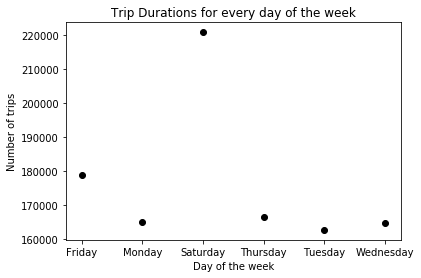

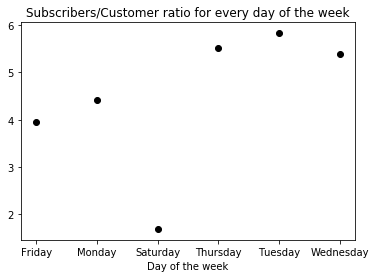

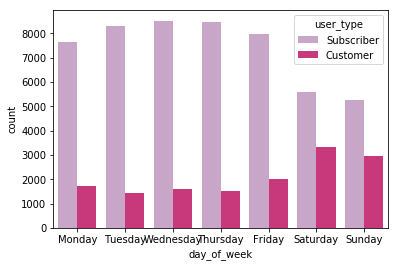

In [55]:
#The average duration of rides and Subscriber-Customer ratio depending on the day of the week

import pandas as pd
import seaborn as sns


with open('./data/Washington-2016-Summary.csv', 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #Creating lists for each day of the week and trip duration   
        wd= ('All data','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
        n_trips = [0,0,0,0,0,0,0,0]
        n_s_trips = [0,0,0,0,0,0,0,0]
        n_c_trips = [0,0,0,0,0,0,0,0]
        n_sc_ratio = [0,0,0,0,0,0,0,0]
    
        for row in reader:
            n_trips[0]+=(round(float(row['duration']),2))
            if row['user_type']=='Subscriber':
                n_s_trips[0]+=1
            else:
                n_c_trips[0]+=1
            if row['day_of_week']==wd[1]:
                n_trips[1]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[1]+=1
                else:
                    n_c_trips[1]+=1
            elif row['day_of_week']==wd[2]:
                n_trips[2]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[2]+=1
                else:
                    n_c_trips[2]+=1
            elif row['day_of_week']==wd[3]:
                n_trips[3]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[3]+=1
                else:
                    n_c_trips[3]+=1
            elif row['day_of_week']==wd[4]:
                n_trips[4]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[4]+=1
                else:
                    n_c_trips[4]+=1
            elif row['day_of_week']==wd[5]:
                n_trips[5]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[5]+=1
                else:
                    n_c_trips[5]+=1
            elif row['day_of_week']==wd[6]:
                n_trips[6]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[6]+=1
                else:
                    n_c_trips[6]+=1
            elif row['day_of_week']==wd[7]:
                n_trips[7]+=(round(float(row['duration']),2))
                if row['user_type']=='Subscriber':
                    n_s_trips[7]+=1
                else:
                    n_c_trips[7]+=1
            else:
                print ('Error reading data file')

#Finishing subscriber_customer ratio
for x in range(1,7):
    n_c_trips[0]=n_c_trips[x]
    n_s_trips[0]=n_c_trips[x]
    n_sc_ratio[x]=n_s_trips[x]/n_c_trips[x]
    
#Updating total trips count
n_trips[0]=n_s_trips[0]+n_c_trips[0]

                
# Plotting a scatter plots
%matplotlib inline               
plt.scatter(wd[1:7], n_trips[1:7], color='Black', label='Total trips')
plt.title('Trip Durations for every day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.show()

%matplotlib inline
plt.title('Subscribers/Customer ratio for every day of the week')
plt.scatter(wd[1:7], n_sc_ratio[1:7], color='Black', label='Subscriber/Customer ratio')
plt.xlabel('Day of the week')
plt.show()

# Plotting a barchard with Pandas and Seaborn package. Provided by Chin Yen
dc=pd.read_csv('./data/Washington-2016-Summary.csv')
sns.countplot(x='day_of_week', data=dc,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              hue='user_type', palette='PuRd')

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I presume that data analysis can be used for the predictive modelling. Previously, I have developed and used structural models for stochastic processes. These were commonly based on raw historical data, lightly filtered and statistically analysied with some PACF, ACF. Most of the times, the models also contained some theoretical dynamics and factors, such as as aforementioned weather, geographical or other exgeneous factors. Using data analysis prior the construction and testing of predictive models may significantly reduce time and increase the forecast accuracy through discovery and provisional tests of the correlation structure between those individual factors as well as time series in question.  

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

255